In [1]:
# lets display some cmap colors from matplotlib & colorlover
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

from plotly.offline import iplot, plot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
import plotly.io as pio
import colorlover as cl 

init_notebook_mode(connected=True)
# comment this out or set to html if you don't care about displaying on github
pio.renderers.default = "png"

from vis.code.color.utils import hex_string_to_rgb, rgb_string_to_tuple, minmax_scale_rgb

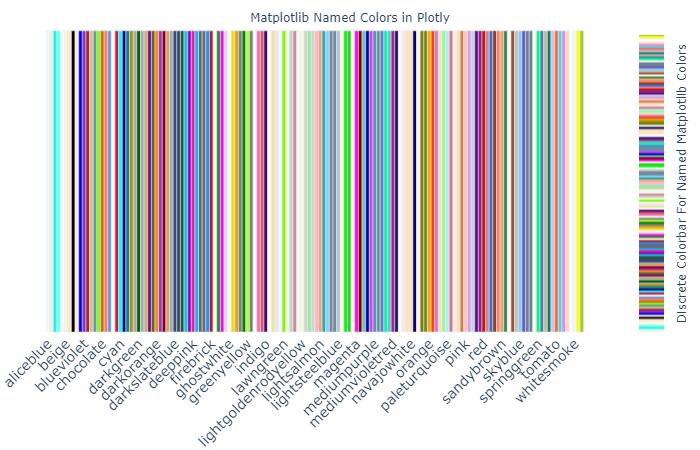

In [2]:
"""
first things first, we want to be able to handle hex to rgb and rgb to hex. One of the benefits of using Jupyter notebooks is we can display the html colors
with the colorlover package and ipython's HTML import. 
https://github.com/jbs-public-function/vis/blob/master/vis/code/color/colorlover_utils.py
"""
matplotlib_named_colors = [[color_name, hex_string_to_rgb(color)] for color_name, color in cm.colors.cnames.items()]
color_name = [i[0] for i in matplotlib_named_colors]
color =  ['rgb{}'.format(i[-1]) for i in matplotlib_named_colors]

fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(go.Bar(x=color_name,
                     y=[1] * len(color),
                     width=[1]*len(color),
                     name='matplotlib colors in plotly',
                     marker_color=color), row=1, col=1)
z = np.linspace(0, 1, len(color))
cscale = list(zip(z, color))
discreet_colorbar_trace = go.Heatmap(
            z=[z], 
            x=color_name, 
            y=[None],
            colorscale=cscale, 
            colorbar = dict(thickness=25, 
                            tickvals=[None], 
                            titleside='right', 
                            yanchor='middle',
                            title='Discrete Colorbar For Named Matplotlib Colors',
                            y=0.47))

fig.add_trace(discreet_colorbar_trace, secondary_y=False)

fig.update_layout(
    title={'text':'Matplotlib Named Colors in Plotly', 'y':0.97, 'x':0.5, 'xanchor':'center', 'yanchor': 'top', 'font_size': 12},
    xaxis_tickfont_size=14,
    xaxis_tickangle=-45,
    yaxis=dict(visible=False, showgrid=False),
    bargap=0.1,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    margin=go.layout.Margin( l=0, r=0, b=30, t=15),
    showlegend=False
)

fig.show()

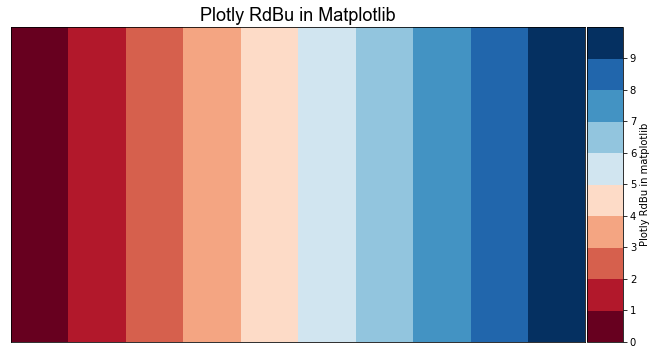

In [3]:
color = [rgb_string_to_tuple(color) for color in cl.scales['10']['div']['RdBu']]
color = minmax_scale_rgb(color)

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.bar(x=list(range(len(color))), height=[1] * len(color), color=color, linewidth=0, align='center', width=1)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('Plotly RdBu in Matplotlib',{'fontname':'Arial', 'fontsize': 18})

cmap = mpl.colors.ListedColormap(color, name='rdbu_plotly')
bounds = list(range(cmap.N))
norm = mpl.colors.Normalize(vmin=0, vmax=10)

fig.subplots_adjust(left=0, right=0.1)
ax.margins(0)
plt.tight_layout()
cbar_ax = fig.add_axes([0.901, 0.040, 0.05, 0.875])
cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, boundaries=bounds + [10], ticks=bounds, orientation='vertical')
cb2.set_label('Plotly RdBu in matplotlib')

##### Colorbars
The most difficult task in this excercise was generating the colorbars. It is interesting how both plotly, and matplotlib display a tremendous amount of resistance to attach a colorbar to an image in a way that doesn't mess with the image. There are specific instances where both matplotlib & plotly will attach colorbars to a plot correctly but just trying to generate and apply one to an image is a difficult task. 

This is the current project of this repository moving forward for right now, mastery of color, and using colorbar mastery as proxy for this goal. It makes sense that colorbars would be the most difficult aspect of colored plotting. In a real sense a colobar is a plot in and of itself. It represents the representation laid out in the primary plot and summarizes information orthogonally.

##### Interesting TidBits
plotly will easily give you a continous colorbar and whether that bar is correct or not is up to the user. In the first plot above, I was able to take all 148 named matplotlib colors and arbitrarily fill in bars with their associated colors. When I went to attach the colorbar using an empty go.Scatter (this is a hack to get colorbars onto plotly plots). I needed to input some vmin, some vmax and it generated a continous colorbar. This colorbar may reflect the colors available in this data set but I needed a more discrete approach. 

Conversely, matplotlib is more than happy to give you a discrete colorbar, it's the continous bars that are the problem

##### moving forward
This closes out this example notebook and this first chapter in color exploration for the time being. Moving forward, I want to build colorscales on the fly, agnostic to matplotlib, plotly, or whatever other plotting libraries I utilize in the future.

* Functions that allow for a min color, max color and are able to discrete or continously blend one into the other
* Functions that map bins to colorscales (a list of colors)
* Further exploration of the matplotlib.colors, matplotlib.cm, and colorlover packages to expedite this process

#### ```FIDDLY``` 
Fiddly is the key takeaway and prime criticism of plotting libraries. It's extremely difficult to standardize & generalize a unique visual solution to less than ideal visual situations. There is always some tweaks that have to be made.


In [4]:
print('Peace Out')

Peace Out
